## Assignment 1: Flow Data Visualization
The data set is a snapshot of water flowing through a channel. Winds acting upon the (open) surface of the water create turbulences inside the water. Movements of water particles (caused by winds) were calculated by students in the first supercomputing class by Prof. Lloyd Fosdick, University of Colorado, 1992. File “field2.irreg” contains data describing the particle movement in a 2d slide perpendicular to the length of the channel. Data is given for a regular 82x82 grid in the following format: starting position (x,y,z) and relative movement (u,v,w).

In [2]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as pat
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
%matplotlib inline

In [3]:
# Reading the data set
data = pd.read_csv('field2.irreg.txt', sep=" " , header=None , skiprows= 6)

In [4]:
data.head()

,0,1,2,3,4,5
0,0.0,0.000000,0,0.0,0.0,0
1,0.0,0.001880,0,0.0,0.0,0
2,0.0,0.005775,0,0.0,0.0,0
3,0.0,0.009945,0,0.0,0.0,0
4,0.0,0.014408,0,0.0,0.0,0


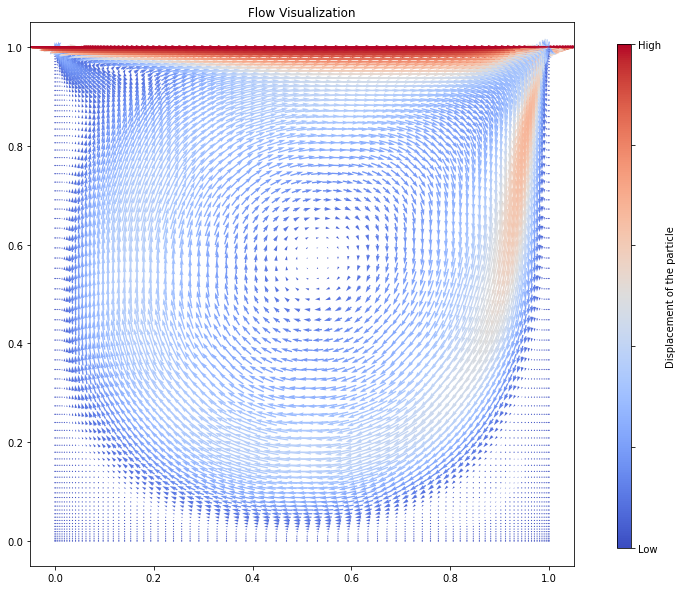

In [20]:
# Normalize and set color 
cmap = plt.cm.coolwarm
cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

# Calculating length of the arrow to determine the color values
length = np.hypot(data[3] , data[4])


colorVal = scalarMap.to_rgba(length)
fig, ax = plt.subplots(figsize=(10,10))
flow = ax.quiver(data[0],data[1],data[3],data[4],color = colorVal ,pivot='mid' , scale = 8  )
ax.set_title('Flow Visualization')
ax.set_aspect('equal')
ax.use_sticky_edges = False


#https://stackoverflow.com/questions/25505674/python-matplotlib-add-colorbar
#https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib

# Setting the Color Bar and it labels
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=cNorm)
cax.set_yticklabels(['Low', '','', '', '','High'])
cb.set_label('Displacement of the particle')

In [180]:
fig.savefig('Assignment1.png' , bbox_inches="tight" , dpi=150)

In [191]:
import cufflinks as cf
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot , iplot
#  To use plotly we need to initate it for each notebook
init_notebook_mode(connected=True)
# To use cufflinks as offline we call the below function
cf.go_offline()

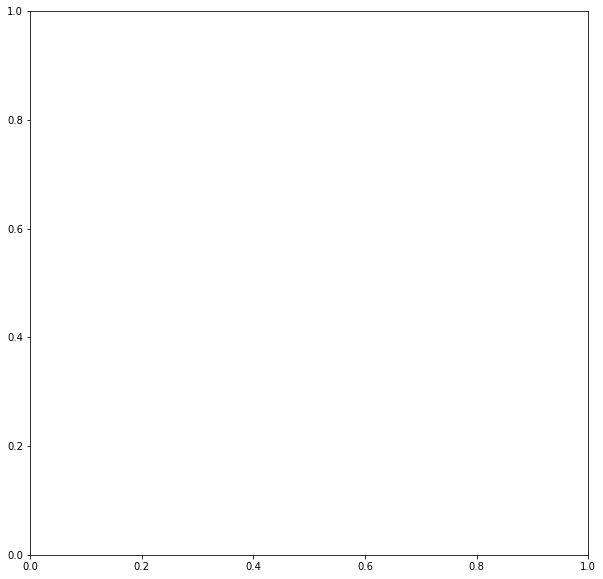

In [197]:
# Normalize and set color 
cmap = plt.cm.twilight
cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

# Calculating length of the arrow to determine the color values
length = np.hypot(data[3] , data[4])


colorVal = scalarMap.to_rgba(length)
fig, ax = plt.subplots(figsize=(10,10))
fig = ff.create_quiver(data[0], data[1], data[3], data[4], scale= 8)
fig.show()
#flow = ax.quiver(,data[1],data[3],data[4],color = colorVal ,pivot='mid' , scale = 8  )
# ax.set_title('Flow Visualization')
# ax.set_aspect('equal')
# ax.use_sticky_edges = False


#https://stackoverflow.com/questions/25505674/python-matplotlib-add-colorbar
#https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib

# Setting the Color Bar and it labels
# cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=cNorm)
# cax.set_yticklabels(['Low', '','', '', '','High'])
# cb.set_label('Displacement of the particle')


# fig.add_trace(go.Scatter(x=[-.7, .75], y=[0,0],
#                     mode='markers',
#                     marker_size=12,
#                     name='points'))

